<a href="https://colab.research.google.com/github/thasliya0404/class-activity/blob/main/model_casestudy_thasliya.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [35]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [36]:
df=pd.read_csv('/content/Training_data.csv')
df

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,9509-MPYOD,Female,0,No,No,35,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,One year,No,Mailed check,20.75,700.45,No
1,7746-AWNQW,Female,0,No,No,28,No,No phone service,DSL,No,...,Yes,Yes,No,No,Month-to-month,Yes,Mailed check,35.75,961.4,No
2,2208-UGTGR,Male,0,No,No,56,Yes,Yes,Fiber optic,No,...,No,No,Yes,Yes,Month-to-month,No,Electronic check,98.60,5581.05,No
3,4884-LEVMQ,Male,0,Yes,No,39,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,Yes,Bank transfer (automatic),20.45,790,No
4,6682-VCIXC,Female,0,Yes,Yes,43,No,No phone service,DSL,NaN,...,No,Yes,Yes,No,One year,Yes,Bank transfer (automatic),51.25,2151.6,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5629,5649-RXQTV,Male,0,No,No,51,Yes,No,Fiber optic,No,...,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,99.00,5038.15,No
5630,3908-MKIMJ,Male,1,Yes,No,68,No,No phone service,DSL,Yes,...,Yes,No,No,No,Two year,Yes,Electronic check,41.95,2965.75,No
5631,4277-BWBML,Male,0,Yes,Yes,72,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Bank transfer (automatic),19.95,1322.85,No
5632,9110-HSGTV,Female,0,No,No,69,Yes,No,DSL,NaN,...,Yes,Yes,Yes,Yes,Two year,Yes,Credit card (automatic),82.45,5555.3,No


In [37]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5634 entries, 0 to 5633
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        5634 non-null   object 
 1   gender            5465 non-null   object 
 2   SeniorCitizen     5634 non-null   int64  
 3   Partner           5634 non-null   object 
 4   Dependents        5634 non-null   object 
 5   tenure            5634 non-null   int64  
 6   PhoneService      5634 non-null   object 
 7   MultipleLines     5634 non-null   object 
 8   InternetService   5634 non-null   object 
 9   OnlineSecurity    5465 non-null   object 
 10  OnlineBackup      5634 non-null   object 
 11  DeviceProtection  5634 non-null   object 
 12  TechSupport       5634 non-null   object 
 13  StreamingTV       5634 non-null   object 
 14  StreamingMovies   5634 non-null   object 
 15  Contract          5634 non-null   object 
 16  PaperlessBilling  5634 non-null   object 


In [38]:
df.isna().sum()

,0
customerID,0
gender,169
SeniorCitizen,0
Partner,0
Dependents,0
tenure,0
PhoneService,0
MultipleLines,0
InternetService,0
OnlineSecurity,169


In [39]:
df.duplicated().sum()

np.int64(0)

In [40]:
null_cols = df[df['gender'].isna()]
null_cols

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
40,8943-URTMR,NaN,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,Yes,No,Month-to-month,Yes,Mailed check,79.65,152.7,Yes
56,2983-ZANRP,NaN,0,Yes,Yes,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Bank transfer (automatic),73.55,145.4,Yes
60,3981-QSVQI,NaN,0,No,No,8,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Month-to-month,Yes,Bank transfer (automatic),19.70,168.9,No
64,4859-ZSRDZ,NaN,0,Yes,Yes,58,No,No phone service,DSL,No,...,Yes,Yes,Yes,Yes,Two year,Yes,Credit card (automatic),55.50,3166.9,No
67,8364-TRMMK,NaN,0,No,No,3,Yes,Yes,DSL,No,...,No,No,No,No,Month-to-month,Yes,Mailed check,50.65,151.3,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5489,3521-MNKLV,NaN,0,No,No,24,Yes,No,DSL,No,...,Yes,No,No,No,Month-to-month,Yes,Mailed check,49.70,1167.8,No
5503,9688-YGXVR,NaN,0,No,No,44,Yes,No,Fiber optic,No,...,Yes,No,Yes,No,Month-to-month,Yes,Credit card (automatic),88.15,3973.2,No
5509,2800-QQUSO,NaN,0,No,No,42,Yes,Yes,Fiber optic,No,...,No,Yes,Yes,Yes,Month-to-month,Yes,Electronic check,100.30,4222.95,No
5571,2150-UWTFY,NaN,0,Yes,Yes,22,Yes,No,DSL,Yes,...,Yes,No,No,No,Month-to-month,No,Mailed check,61.15,1422.05,Yes


In [41]:
null_cols1 = df[df['OnlineSecurity'].isna()]
null_cols1

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
4,6682-VCIXC,Female,0,Yes,Yes,43,No,No phone service,DSL,NaN,...,No,Yes,Yes,No,One year,Yes,Bank transfer (automatic),51.25,2151.6,No
21,2719-BDAQO,Male,0,No,No,17,Yes,No,Fiber optic,NaN,...,No,No,Yes,Yes,Month-to-month,No,Electronic check,93.85,NaN,Yes
32,6630-UJZMY,Female,1,Yes,No,4,Yes,Yes,Fiber optic,NaN,...,No,No,Yes,No,Month-to-month,Yes,Electronic check,83.25,308.05,No
39,5816-QVHRX,Female,0,No,No,37,Yes,Yes,Fiber optic,NaN,...,No,Yes,Yes,Yes,Month-to-month,No,Credit card (automatic),100.30,3541.4,No
48,3441-CGZJH,Female,0,Yes,Yes,43,No,No phone service,DSL,NaN,...,Yes,Yes,Yes,Yes,One year,Yes,Credit card (automatic),60.40,2640.55,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5453,6341-AEVKX,Female,0,Yes,No,62,Yes,No,Fiber optic,NaN,...,Yes,Yes,Yes,Yes,One year,Yes,Electronic check,104.30,6613.65,No
5470,9793-WECQC,Male,0,No,No,23,Yes,No,Fiber optic,NaN,...,No,No,Yes,Yes,Month-to-month,No,Mailed check,95.30,2192.9,No
5530,5248-YGIJN,Male,0,Yes,No,72,Yes,Yes,DSL,NaN,...,Yes,Yes,Yes,Yes,Two year,Yes,Credit card (automatic),90.25,NaN,No
5554,0214-JHPFW,Female,0,Yes,No,70,No,No phone service,DSL,NaN,...,Yes,Yes,Yes,Yes,Two year,No,Bank transfer (automatic),57.80,4039.3,No


In [42]:
df.loc[(df['OnlineSecurity'].isna()) & (df['InternetService']=='No'),'OnlineSecurity']='No internet service'

In [43]:
df.isna().sum()

,0
customerID,0
gender,169
SeniorCitizen,0
Partner,0
Dependents,0
tenure,0
PhoneService,0
MultipleLines,0
InternetService,0
OnlineSecurity,137


In [44]:
df.mode()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,0002-ORFBO,Male,0.0,No,No,1.0,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,20.05,,No
1,0003-MKNFE,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,0004-TLHLJ,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,0011-IGKFF,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,0013-SMEOE,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5629,9987-LUTYD,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5630,9992-RRAMN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5631,9992-UJOEL,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5632,9993-LHIEB,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [45]:
df['gender'].fillna(df['gender'].mode()[0],inplace=True)


/tmp/ipython-input-2209786701.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['gender'].fillna(df['gender'].mode()[0],inplace=True)


In [46]:
df['OnlineSecurity'].fillna(df['OnlineSecurity'].mode()[0],inplace=True)

/tmp/ipython-input-4231033268.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['OnlineSecurity'].fillna(df['OnlineSecurity'].mode()[0],inplace=True)


In [47]:
df.isna().sum()

,0
customerID,0
gender,0
SeniorCitizen,0
Partner,0
Dependents,0
tenure,0
PhoneService,0
MultipleLines,0
InternetService,0
OnlineSecurity,0


In [48]:
df['TotalCharges']=pd.to_numeric(df['TotalCharges'],errors='coerce')

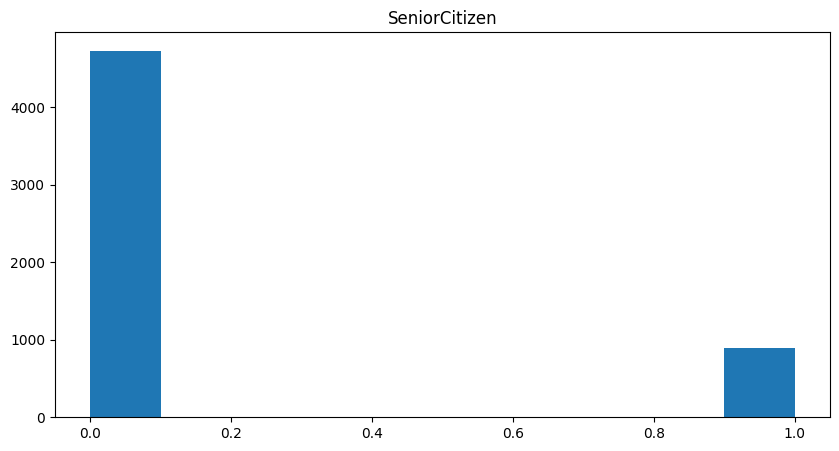

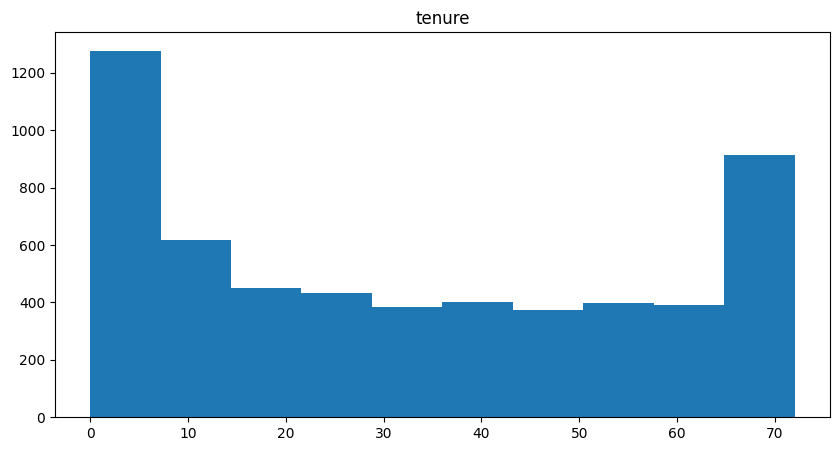

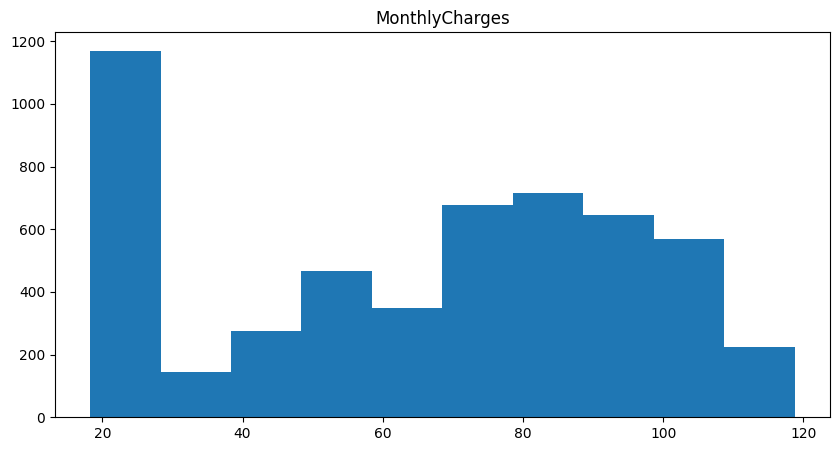

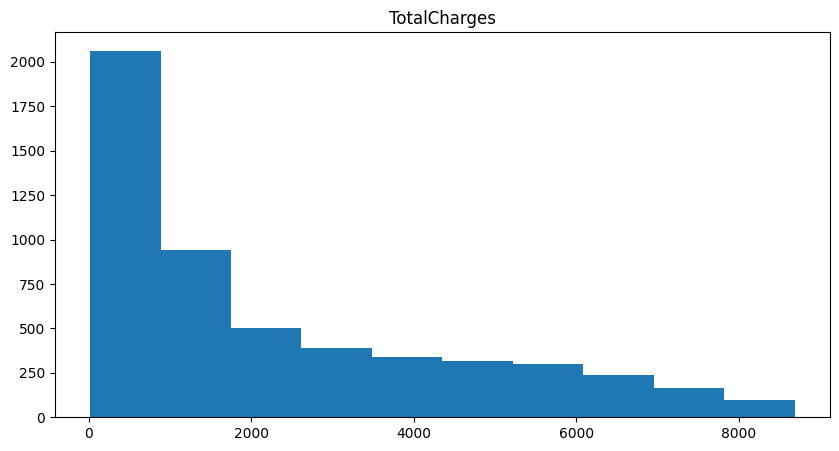

In [49]:
for col in df.select_dtypes(include=np.number).columns:
  if col != 'customerID':
    plt.figure(figsize=(10,5))
    plt.hist(df[col])
    plt.title(col)
    plt.show()

In [50]:
df.select_dtypes(include=np.number).median()

,0
SeniorCitizen,0.00
tenure,29.00
MonthlyCharges,70.65
TotalCharges,1396.45


In [51]:
df.fillna(df.select_dtypes(include=np.number).median(),inplace=True)

In [52]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5634 entries, 0 to 5633
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        5634 non-null   object 
 1   gender            5634 non-null   object 
 2   SeniorCitizen     5634 non-null   int64  
 3   Partner           5634 non-null   object 
 4   Dependents        5634 non-null   object 
 5   tenure            5634 non-null   int64  
 6   PhoneService      5634 non-null   object 
 7   MultipleLines     5634 non-null   object 
 8   InternetService   5634 non-null   object 
 9   OnlineSecurity    5634 non-null   object 
 10  OnlineBackup      5634 non-null   object 
 11  DeviceProtection  5634 non-null   object 
 12  TechSupport       5634 non-null   object 
 13  StreamingTV       5634 non-null   object 
 14  StreamingMovies   5634 non-null   object 
 15  Contract          5634 non-null   object 
 16  PaperlessBilling  5634 non-null   object 


In [53]:
num_cols=df.select_dtypes(np.number)
num_cols

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges
0,0,35,20.75,700.45
1,0,28,35.75,961.40
2,0,56,98.60,5581.05
3,0,39,20.45,790.00
4,0,43,51.25,2151.60
...,...,...,...,...
5629,0,51,99.00,5038.15
5630,1,68,41.95,2965.75
5631,0,72,19.95,1322.85
5632,0,69,82.45,5555.30


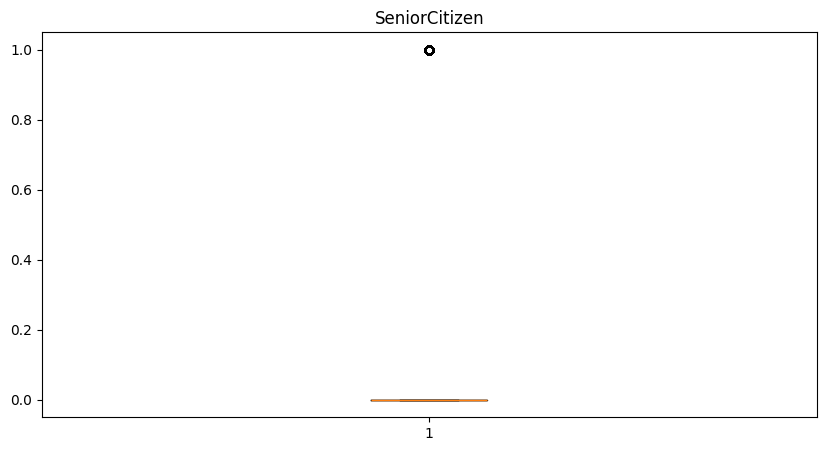

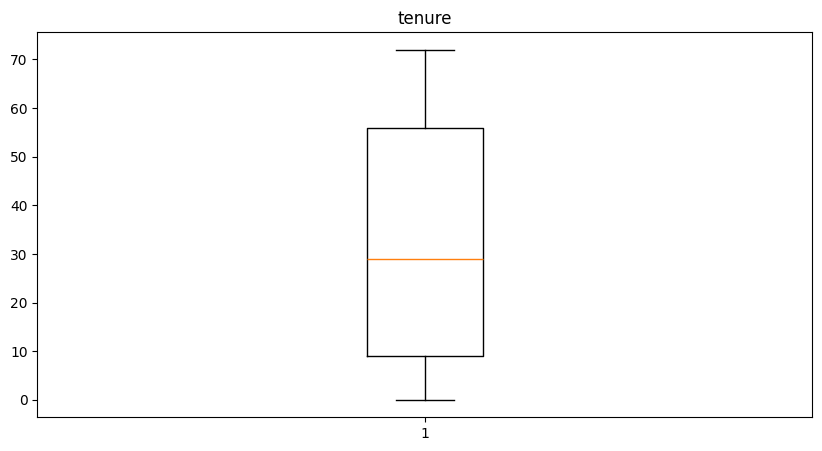

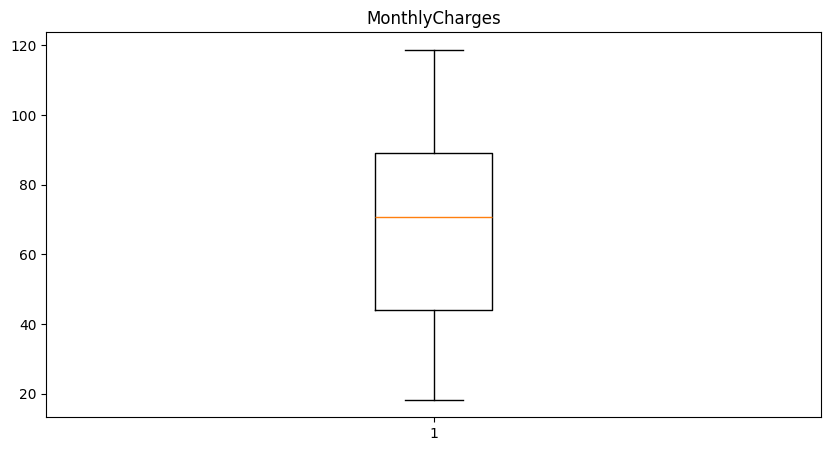

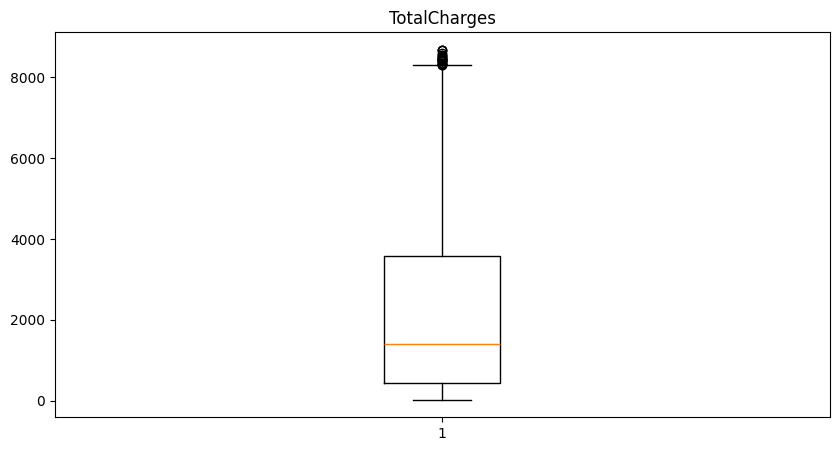

In [54]:
for i in num_cols:
  plt.figure(figsize=(10,5))
  plt.boxplot(df[i])
  plt.title(i)

In [55]:
from scipy.stats.mstats import winsorize

In [56]:
df['TotalCharges']=winsorize(df['TotalCharges'],limits=(0.01,0.01))
df['TotalCharges']

,TotalCharges
0,700.45
1,961.40
2,5581.05
3,790.00
4,2151.60
...,...
5629,5038.15
5630,2965.75
5631,1322.85
5632,5555.30


In [57]:
from sklearn.preprocessing import LabelEncoder

In [58]:
lab_enc=LabelEncoder()
df['gender']=lab_enc.fit_transform(df['gender'])
df['gender']

,gender
0,0
1,0
2,1
3,1
4,0
...,...
5629,1
5630,1
5631,1
5632,0


In [59]:
df['Partner']=lab_enc.fit_transform(df['Partner'])
df['Dependents']=lab_enc.fit_transform(df['Dependents'])
df['PhoneService']=lab_enc.fit_transform(df['PhoneService'])
df['MultipleLines']=lab_enc.fit_transform(df['MultipleLines'])
df['InternetService']=lab_enc.fit_transform(df['InternetService'])
df['OnlineSecurity']=lab_enc.fit_transform(df['OnlineSecurity'])
df['OnlineBackup']=lab_enc.fit_transform(df['OnlineBackup'])
df['DeviceProtection']=lab_enc.fit_transform(df['DeviceProtection'])
df['TechSupport']=lab_enc.fit_transform(df['TechSupport'])
df['StreamingTV']=lab_enc.fit_transform(df['StreamingTV'])
df['StreamingMovies']=lab_enc.fit_transform(df['StreamingMovies'])
df['Contract']=lab_enc.fit_transform(df['Contract'])
df['PaperlessBilling']=lab_enc.fit_transform(df['PaperlessBilling'])
df['PaymentMethod']=lab_enc.fit_transform(df['PaymentMethod'])
df['Churn']=lab_enc.fit_transform(df['Churn'])

In [60]:
df['Customer Lifetime Value'] = df['tenure'] * df['Contract']
df

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn,Customer Lifetime Value
0,9509-MPYOD,0,0,0,0,35,1,0,2,1,...,1,1,1,1,0,3,20.75,700.45,0,35
1,7746-AWNQW,0,0,0,0,28,0,1,0,0,...,2,0,0,0,1,3,35.75,961.40,0,0
2,2208-UGTGR,1,0,0,0,56,1,2,1,0,...,0,2,2,0,0,2,98.60,5581.05,0,0
3,4884-LEVMQ,1,0,1,0,39,1,0,2,1,...,1,1,1,2,1,0,20.45,790.00,0,78
4,6682-VCIXC,0,0,1,1,43,0,1,0,0,...,2,2,0,1,1,0,51.25,2151.60,0,43
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5629,5649-RXQTV,1,0,0,0,51,1,0,1,0,...,0,2,2,0,1,2,99.00,5038.15,0,0
5630,3908-MKIMJ,1,1,1,0,68,0,1,0,2,...,0,0,0,2,1,2,41.95,2965.75,0,136
5631,4277-BWBML,1,0,1,1,72,1,0,2,1,...,1,1,1,2,0,0,19.95,1322.85,0,144
5632,9110-HSGTV,0,0,0,0,69,1,0,0,0,...,2,2,2,2,1,1,82.45,5555.30,0,138


In [61]:
df['Customer Lifetime Value'] = lab_enc.fit_transform(df['Customer Lifetime Value'])

In [62]:
df

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn,Customer Lifetime Value
0,9509-MPYOD,0,0,0,0,35,1,0,2,1,...,1,1,1,1,0,3,20.75,700.45,0,35
1,7746-AWNQW,0,0,0,0,28,0,1,0,0,...,2,0,0,0,1,3,35.75,961.40,0,0
2,2208-UGTGR,1,0,0,0,56,1,2,1,0,...,0,2,2,0,0,2,98.60,5581.05,0,0
3,4884-LEVMQ,1,0,1,0,39,1,0,2,1,...,1,1,1,2,1,0,20.45,790.00,0,75
4,6682-VCIXC,0,0,1,1,43,0,1,0,0,...,2,2,0,1,1,0,51.25,2151.60,0,43
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5629,5649-RXQTV,1,0,0,0,51,1,0,1,0,...,0,2,2,0,1,2,99.00,5038.15,0,0
5630,3908-MKIMJ,1,1,1,0,68,0,1,0,2,...,0,0,0,2,1,2,41.95,2965.75,0,104
5631,4277-BWBML,1,0,1,1,72,1,0,2,1,...,1,1,1,2,0,0,19.95,1322.85,0,108
5632,9110-HSGTV,0,0,0,0,69,1,0,0,0,...,2,2,2,2,1,1,82.45,5555.30,0,105


In [63]:
df.drop(columns=['customerID'],inplace=True)

In [64]:
df.drop(columns=['Churn'])

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Customer Lifetime Value
0,0,0,0,0,35,1,0,2,1,1,1,1,1,1,1,0,3,20.75,700.45,35
1,0,0,0,0,28,0,1,0,0,0,2,2,0,0,0,1,3,35.75,961.40,0
2,1,0,0,0,56,1,2,1,0,2,0,0,2,2,0,0,2,98.60,5581.05,0
3,1,0,1,0,39,1,0,2,1,1,1,1,1,1,2,1,0,20.45,790.00,75
4,0,0,1,1,43,0,1,0,0,2,0,2,2,0,1,1,0,51.25,2151.60,43
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5629,1,0,0,0,51,1,0,1,0,2,2,0,2,2,0,1,2,99.00,5038.15,0
5630,1,1,1,0,68,0,1,0,2,2,2,0,0,0,2,1,2,41.95,2965.75,104
5631,1,0,1,1,72,1,0,2,1,1,1,1,1,1,2,0,0,19.95,1322.85,108
5632,0,0,0,0,69,1,0,0,0,0,2,2,2,2,2,1,1,82.45,5555.30,105


{'whiskers': [<matplotlib.lines.Line2D at 0x78c86cbb4a70>,
 'caps': [<matplotlib.lines.Line2D at 0x78c86cbb4470>,
 'boxes': [<matplotlib.lines.Line2D at 0x78c86cbb4890>],
 'medians': [<matplotlib.lines.Line2D at 0x78c86cbb4110>],
 'fliers': [<matplotlib.lines.Line2D at 0x78c86cbb6990>],
 'means': []}

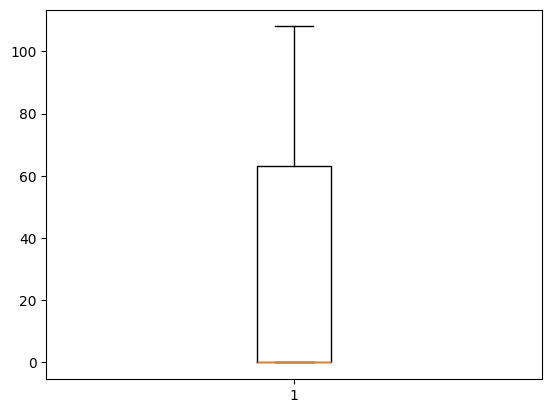

In [65]:
plt.boxplot(df['Customer Lifetime Value'])

In [66]:
from sklearn.model_selection import  train_test_split
y = df['Churn']
x = df.drop(columns=['Churn'])
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=42)

In [67]:
from sklearn.preprocessing import StandardScaler,MinMaxScaler

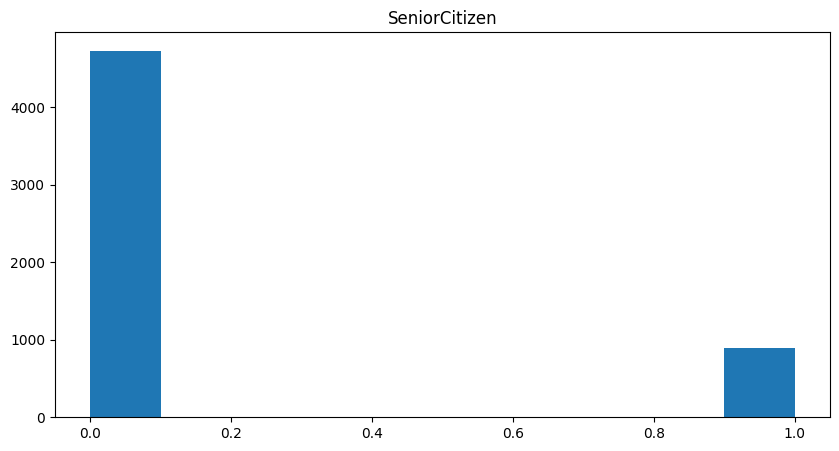

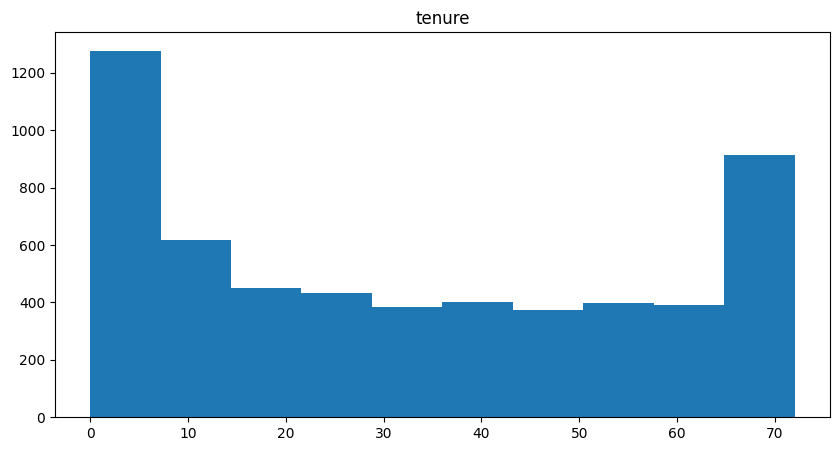

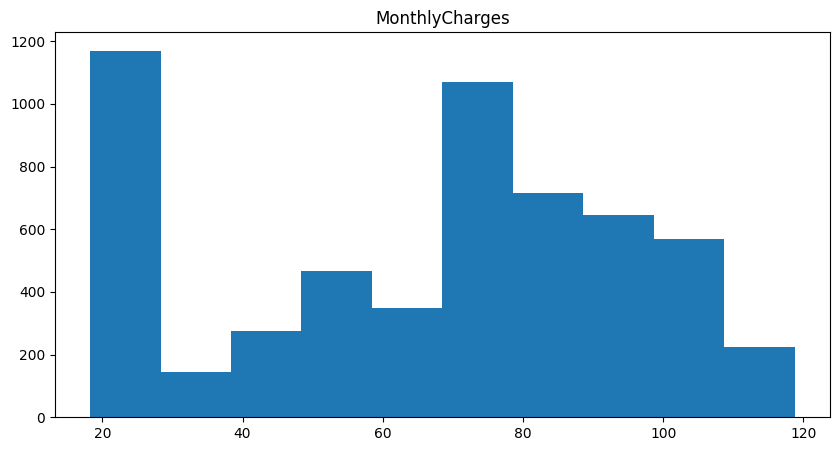

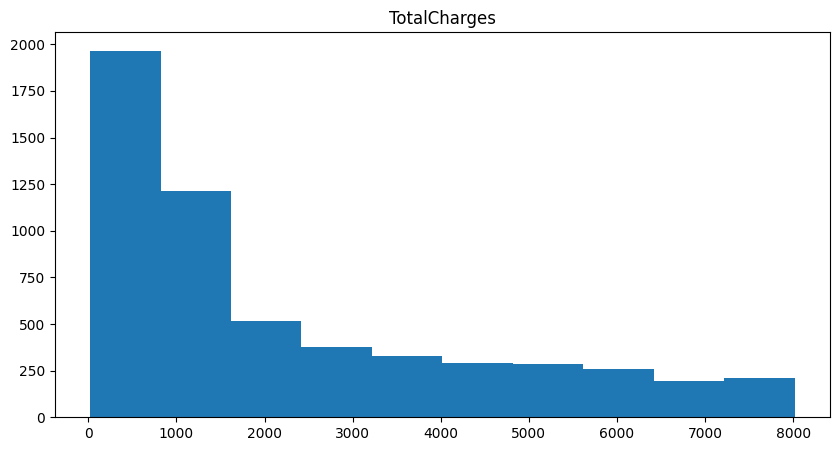

In [68]:
for i in num_cols:
  plt.figure(figsize=(10,5))
  plt.hist(df[i])
  plt.title(i)

In [69]:
min_scaler=MinMaxScaler()
x_train[['tenure','MonthlyCharges','TotalCharges','Customer Lifetime Value']]=min_scaler.fit_transform(x_train[['tenure',
                                                                            'MonthlyCharges','TotalCharges','Customer Lifetime Value']])
x_test[['tenure','MonthlyCharges','TotalCharges','Customer Lifetime Value']]=min_scaler.transform(x_test[['tenure',
                                                                                'MonthlyCharges','TotalCharges','Customer Lifetime Value']])

In [70]:
x_train[['tenure','MonthlyCharges','TotalCharges','Customer Lifetime Value']]

,tenure,MonthlyCharges,TotalCharges,Customer Lifetime Value
4082,0.694444,0.895522,0.676717,0.462963
1728,0.125000,0.307960,0.053522,0.000000
2795,0.041667,0.792537,0.036940,0.000000
334,0.500000,0.020896,0.084529,0.333333
3625,0.416667,0.219403,0.144191,0.000000
...,...,...,...,...
3772,0.527778,0.504975,0.331330,0.351852
5191,0.944444,0.012438,0.146767,0.629630
5226,0.750000,0.415423,0.406924,0.833333
5390,0.041667,0.508458,0.172140,0.000000


In [71]:
x_test[['tenure','MonthlyCharges','TotalCharges','Customer Lifetime Value']]

,tenure,MonthlyCharges,TotalCharges,Customer Lifetime Value
2121,0.861111,0.054726,0.178436,0.574074
915,0.958333,0.790050,0.840803,0.972222
2585,0.763889,0.717910,0.635168,0.000000
787,0.027778,0.017413,0.002626,0.000000
101,0.027778,0.521393,0.015538,0.000000
...,...,...,...,...
4416,0.513889,0.015920,0.172140,0.342593
1954,1.000000,0.958209,1.000000,1.000000
1616,0.333333,0.759701,0.283023,0.000000
3807,0.111111,0.270647,0.049001,0.000000


In [72]:
from sklearn.linear_model import LogisticRegression
logit_model = LogisticRegression()
logit_model.fit(x_train,y_train)
y_pred =logit_model.predict(x_test)

In [73]:
y_pred

array([0, 0, 0, ..., 0, 0, 0])

In [74]:
from sklearn.metrics import confusion_matrix,accuracy_score,precision_score,recall_score,f1_score
print('accuracy_score is',accuracy_score(y_test,y_pred))
print('precision is',precision_score(y_test,y_pred, average='weighted'))
print('recall is',recall_score(y_test,y_pred, average='weighted'))
print('f1 score is',f1_score(y_test,y_pred, average='weighted'))

accuracy_score is 0.7941437444543035
precision is 0.7865398180629993
recall is 0.7941437444543035
f1 score is 0.7883915819392981


In [75]:
confusion_matrix(y_test,y_pred)

array([[713,  90],
       [142, 182]])

Text(0.5, 1.0, 'LogisticRegression-ConfusionMatrix')

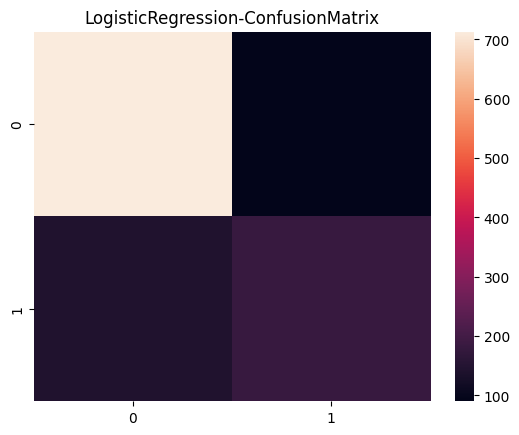

In [76]:
sns.heatmap(confusion_matrix(y_test,y_pred))
plt.title('LogisticRegression-ConfusionMatrix')

In [77]:
df.corr()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,...,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn,Customer Lifetime Value
gender,1.000000,0.005492,0.014386,0.017469,0.008027,-0.012031,0.003361,-0.001620,-0.005238,-0.008130,...,0.003210,-0.004217,-0.001177,0.005276,-0.013082,0.002152,-0.005832,-0.004801,-0.010942,0.007867
SeniorCitizen,0.005492,1.000000,0.020026,-0.211401,0.022672,-0.001077,0.143242,-0.033889,-0.122685,-0.002308,...,-0.150887,0.029013,0.042213,-0.139901,0.139978,-0.041336,0.205024,0.101680,0.147568,-0.095826
Partner,0.014386,0.020026,1.000000,0.446565,0.380413,0.014722,0.142104,0.005012,0.148273,0.151355,...,0.133543,0.138860,0.128567,0.297348,-0.023574,-0.161005,0.093530,0.313051,-0.156947,0.318060
Dependents,0.017469,-0.211401,0.446565,1.000000,0.155722,-0.004817,-0.026478,0.049337,0.165043,0.095799,...,0.129345,0.044647,0.020499,0.240714,-0.119744,-0.041358,-0.110288,0.057972,-0.171100,0.198333
tenure,0.008027,0.022672,0.380413,0.155722,1.000000,0.004304,0.341771,-0.029703,0.321757,0.373955,...,0.329880,0.288592,0.296837,0.675423,0.003805,-0.375795,0.232216,0.797664,-0.358802,0.806581
PhoneService,-0.012031,-0.001077,0.014722,-0.004817,0.004304,1.000000,-0.019829,0.389311,-0.003433,0.027847,...,-0.020865,0.046692,0.040202,-0.005294,0.020433,0.007867,0.239325,0.104160,0.014327,0.004802
MultipleLines,0.003361,0.143242,0.142104,-0.026478,0.341771,-0.019829,1.000000,-0.111783,0.003692,0.122673,...,0.011153,0.183013,0.185827,0.109731,0.168897,-0.175852,0.424434,0.446447,0.037540,0.188311
InternetService,-0.001620,-0.033889,0.005012,0.049337,-0.029703,0.389311,-0.111783,1.000000,-0.018567,0.031393,...,-0.028547,0.101599,0.096470,0.097203,-0.138948,0.091968,-0.306803,-0.173213,-0.051762,0.032685
OnlineSecurity,-0.005238,-0.122685,0.148273,0.165043,0.321757,-0.003433,0.003692,-0.018567,1.000000,0.179280,...,0.282672,0.037369,0.060127,0.369281,-0.156537,-0.099463,-0.055610,0.239364,-0.292819,0.358770
OnlineBackup,-0.008130,-0.002308,0.151355,0.095799,0.373955,0.027847,0.122673,0.031393,0.179280,1.000000,...,0.186975,0.146968,0.136547,0.290218,-0.015740,-0.127093,0.124020,0.370265,-0.194567,0.312143


In [78]:
from sklearn.tree import DecisionTreeClassifier

In [79]:
dtree=DecisionTreeClassifier(max_depth=5,random_state=42)
dtree.fit(x_train,y_train)
y_pred1=dtree.predict(x_test)

In [80]:
y_pred1

array([0, 0, 0, ..., 1, 0, 0])

In [81]:
from sklearn.metrics import confusion_matrix,accuracy_score,precision_score,recall_score,f1_score
print('accuracy_score is',accuracy_score(y_test,y_pred1))
print('precision is',precision_score(y_test,y_pred1, average='weighted'))
print('recall is',recall_score(y_test,y_pred1, average='weighted'))
print('f1 score is',f1_score(y_test,y_pred1, average='weighted'))

accuracy_score is 0.7790594498669032
precision is 0.7666692955485163
recall is 0.7790594498669032
f1 score is 0.7651981502534214


In [82]:
confusion_matrix(y_test,y_pred1)

array([[729,  74],
       [175, 149]])

Text(0.5, 1.0, 'DecisionTree-ConfusionMatrix')

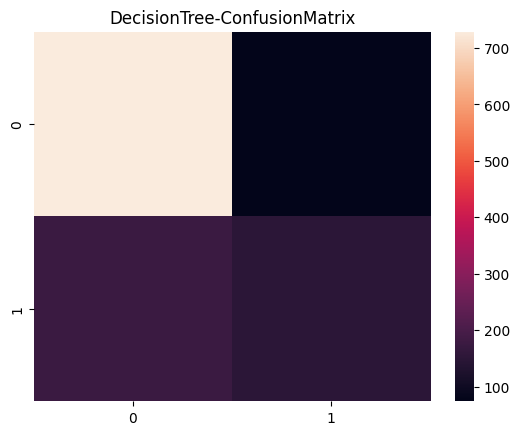

In [83]:
sns.heatmap(confusion_matrix(y_test,y_pred1))
plt.title('DecisionTree-ConfusionMatrix')

In [84]:
from sklearn.ensemble import RandomForestClassifier

In [85]:
rforest=RandomForestClassifier(n_estimators=100,random_state=42)
rforest.fit(x_train,y_train)
y_pred2=rforest.predict(x_test)

In [86]:
y_pred2

array([0, 0, 0, ..., 1, 0, 0])

In [87]:
from sklearn.metrics import confusion_matrix,accuracy_score,precision_score,recall_score,f1_score
print('accuracy_score is',accuracy_score(y_test,y_pred2))
print('precision is',precision_score(y_test,y_pred2, average='weighted'))
print('recall is',recall_score(y_test,y_pred2, average='weighted'))
print('f1 score is',f1_score(y_test,y_pred2, average='weighted'))

accuracy_score is 0.7755102040816326
precision is 0.7645276252522156
recall is 0.7755102040816326
f1 score is 0.7664506094119687


In [88]:
confusion_matrix(y_test,y_pred2)

array([[712,  91],
       [162, 162]])

Text(0.5, 1.0, 'RandomForest-ConfusionMatrix')

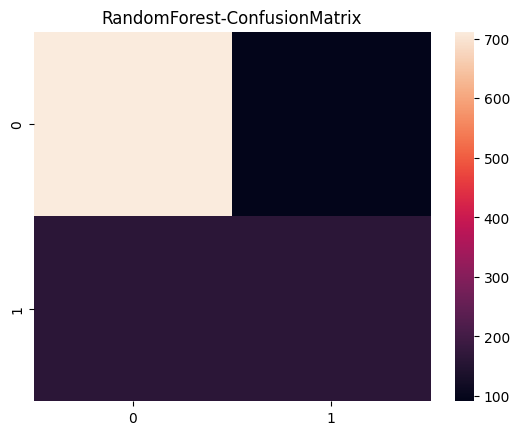

In [89]:
sns.heatmap(confusion_matrix(y_test,y_pred2))
plt.title('RandomForest-ConfusionMatrix')

In [90]:
rforest.get_params()

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': 'sqrt',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'monotonic_cst': None,
 'n_estimators': 100,
 'n_jobs': None,
 'oob_score': False,
 'random_state': 42,
 'verbose': 0,
 'warm_start': False}

In [91]:
data=pd.read_csv('/content/Testing_data.csv')
data

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,6080-TCMYC,Male,0,Yes,Yes,40,Yes,Yes,Fiber optic,No,...,Yes,No,No,No,Month-to-month,Yes,Electronic check,81.20,3292.3,No
1,7285-KLOTR,Female,0,Yes,No,12,Yes,Yes,DSL,Yes,...,Yes,No,Yes,Yes,One year,No,Electronic check,78.85,876.75,No
2,7486-KSRVI,Male,0,No,No,43,Yes,Yes,Fiber optic,No,...,No,Yes,Yes,Yes,One year,Yes,Electronic check,100.00,4211.55,Yes
3,9924-JPRMC,Male,0,No,No,72,Yes,Yes,Fiber optic,Yes,...,Yes,Yes,Yes,Yes,Two year,Yes,Electronic check,118.20,8547.15,No
4,4439-YRNVD,Female,0,No,No,10,No,No phone service,DSL,No,...,No,Yes,No,No,Month-to-month,No,Electronic check,36.25,374,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1404,2039-JONDJ,Male,0,No,No,27,Yes,No,DSL,Yes,...,No,No,No,No,One year,No,Bank transfer (automatic),55.45,1477.65,No
1405,2516-VQRRV,Female,1,No,No,2,Yes,Yes,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Mailed check,75.45,158.4,Yes
1406,5570-PTWEH,Female,0,Yes,No,3,Yes,Yes,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Credit card (automatic),75.15,216.75,Yes
1407,1722-LDZJS,Male,0,Yes,Yes,53,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,One year,No,Credit card (automatic),20.20,1068.15,No


In [92]:
data.columns

Index(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

In [93]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1409 entries, 0 to 1408
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        1409 non-null   object 
 1   gender            1409 non-null   object 
 2   SeniorCitizen     1409 non-null   int64  
 3   Partner           1409 non-null   object 
 4   Dependents        1409 non-null   object 
 5   tenure            1409 non-null   int64  
 6   PhoneService      1409 non-null   object 
 7   MultipleLines     1409 non-null   object 
 8   InternetService   1409 non-null   object 
 9   OnlineSecurity    1409 non-null   object 
 10  OnlineBackup      1409 non-null   object 
 11  DeviceProtection  1409 non-null   object 
 12  TechSupport       1409 non-null   object 
 13  StreamingTV       1409 non-null   object 
 14  StreamingMovies   1409 non-null   object 
 15  Contract          1409 non-null   object 
 16  PaperlessBilling  1409 non-null   object 


In [94]:
data.duplicated().sum()

np.int64(0)

In [95]:
data['TotalCharges'] = pd.to_numeric(data['TotalCharges'],errors='coerce')

In [96]:
num_cols2 = data.select_dtypes(np.number)
num_cols2

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges
0,0,40,81.20,3292.30
1,0,12,78.85,876.75
2,0,43,100.00,4211.55
3,0,72,118.20,8547.15
4,0,10,36.25,374.00
...,...,...,...,...
1404,0,27,55.45,1477.65
1405,1,2,75.45,158.40
1406,0,3,75.15,216.75
1407,0,53,20.20,1068.15


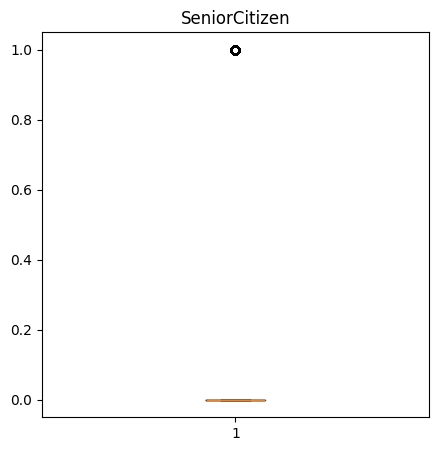

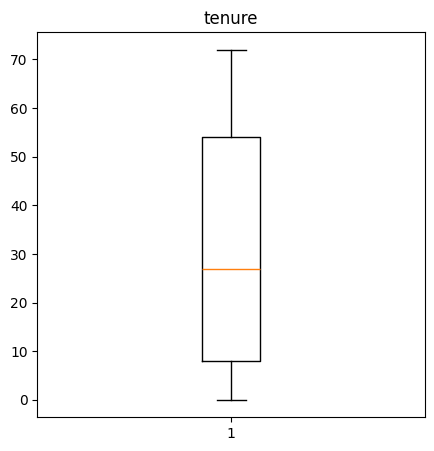

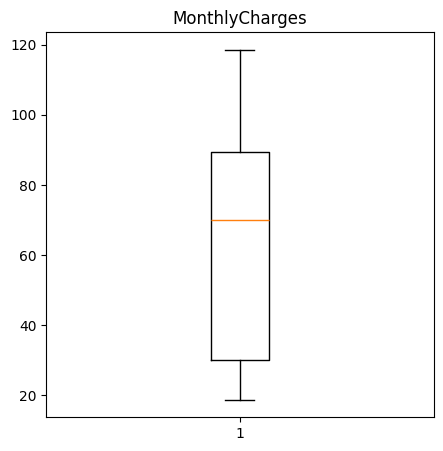

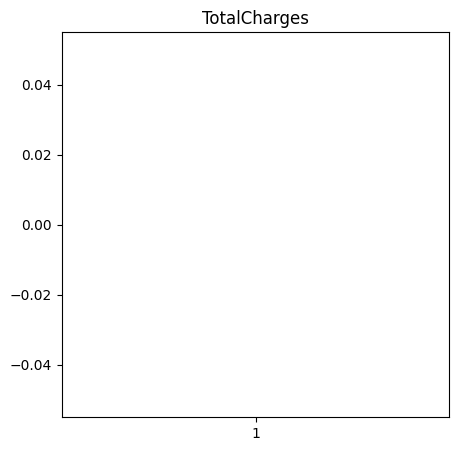

In [97]:
for i in num_cols2:
  plt.figure(figsize=(5,5))
  plt.title(i)
  plt.boxplot(data[i])

In [98]:
data['Contract'] = lab_enc.fit_transform(data['Contract'])

In [99]:
data['Customer Lifetime Value'] = data['tenure'] * data['Contract']
data

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn,Customer Lifetime Value
0,6080-TCMYC,Male,0,Yes,Yes,40,Yes,Yes,Fiber optic,No,...,No,No,No,0,Yes,Electronic check,81.20,3292.30,No,0
1,7285-KLOTR,Female,0,Yes,No,12,Yes,Yes,DSL,Yes,...,No,Yes,Yes,1,No,Electronic check,78.85,876.75,No,12
2,7486-KSRVI,Male,0,No,No,43,Yes,Yes,Fiber optic,No,...,Yes,Yes,Yes,1,Yes,Electronic check,100.00,4211.55,Yes,43
3,9924-JPRMC,Male,0,No,No,72,Yes,Yes,Fiber optic,Yes,...,Yes,Yes,Yes,2,Yes,Electronic check,118.20,8547.15,No,144
4,4439-YRNVD,Female,0,No,No,10,No,No phone service,DSL,No,...,Yes,No,No,0,No,Electronic check,36.25,374.00,No,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1404,2039-JONDJ,Male,0,No,No,27,Yes,No,DSL,Yes,...,No,No,No,1,No,Bank transfer (automatic),55.45,1477.65,No,27
1405,2516-VQRRV,Female,1,No,No,2,Yes,Yes,Fiber optic,No,...,No,No,No,0,Yes,Mailed check,75.45,158.40,Yes,0
1406,5570-PTWEH,Female,0,Yes,No,3,Yes,Yes,Fiber optic,No,...,No,No,No,0,Yes,Credit card (automatic),75.15,216.75,Yes,0
1407,1722-LDZJS,Male,0,Yes,Yes,53,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,1,No,Credit card (automatic),20.20,1068.15,No,53


In [100]:
data['gender'] = lab_enc.fit_transform(data['gender'])
data['Partner'] = lab_enc.fit_transform(data['Partner'])
data['Dependents'] = lab_enc.fit_transform(data['Dependents'])
data['PhoneService'] = lab_enc.fit_transform(data['PhoneService'])
data['MultipleLines'] = lab_enc.fit_transform(data['MultipleLines'])
data['InternetService'] = lab_enc.fit_transform(data['InternetService'])
data['OnlineSecurity'] = lab_enc.fit_transform(data['OnlineSecurity'])
data['OnlineBackup'] = lab_enc.fit_transform(data['OnlineBackup'])
data['DeviceProtection'] = lab_enc.fit_transform(data['DeviceProtection'])
data['TechSupport'] = lab_enc.fit_transform(data['TechSupport'])
data['StreamingTV'] = lab_enc.fit_transform(data['StreamingTV'])
data['StreamingMovies'] = lab_enc.fit_transform(data['StreamingMovies'])
data['PaperlessBilling'] = lab_enc.fit_transform(data['PaperlessBilling'])
data['PaymentMethod'] = lab_enc.fit_transform(data['PaymentMethod'])
data['Churn'] = lab_enc.fit_transform(data['Churn'])

In [101]:
ytest =data['Churn']
xtest = data.drop(columns=['Churn','customerID'])

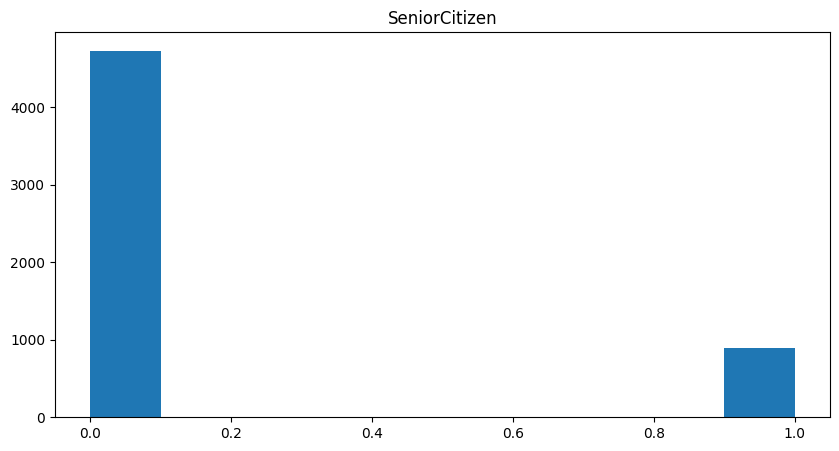

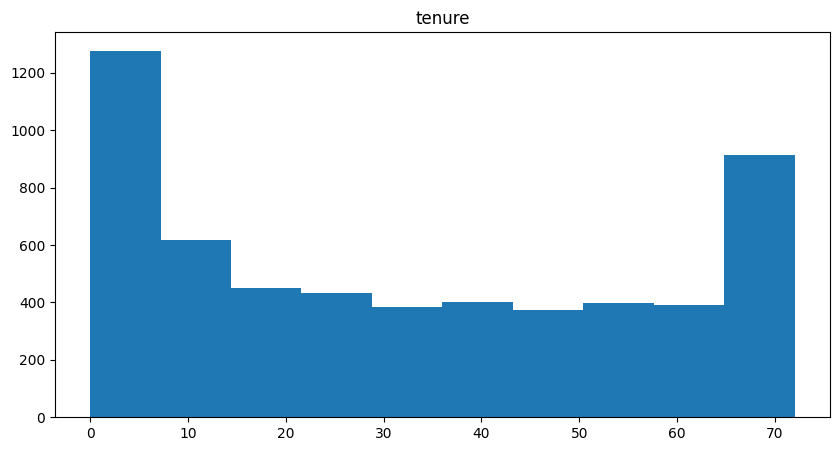

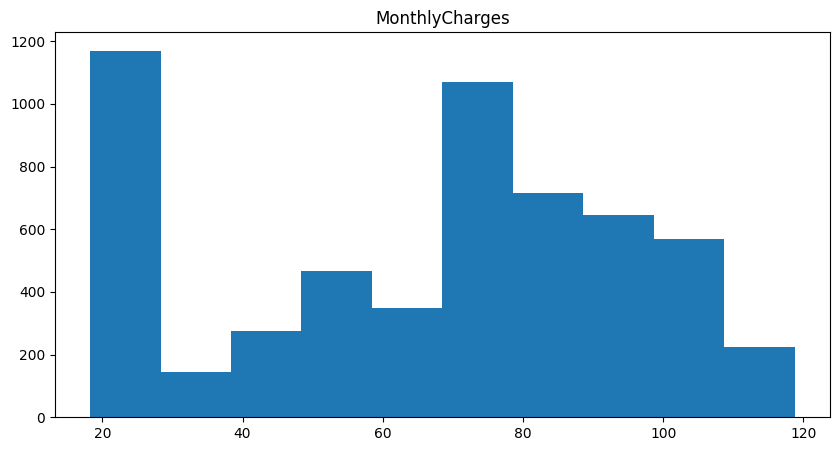

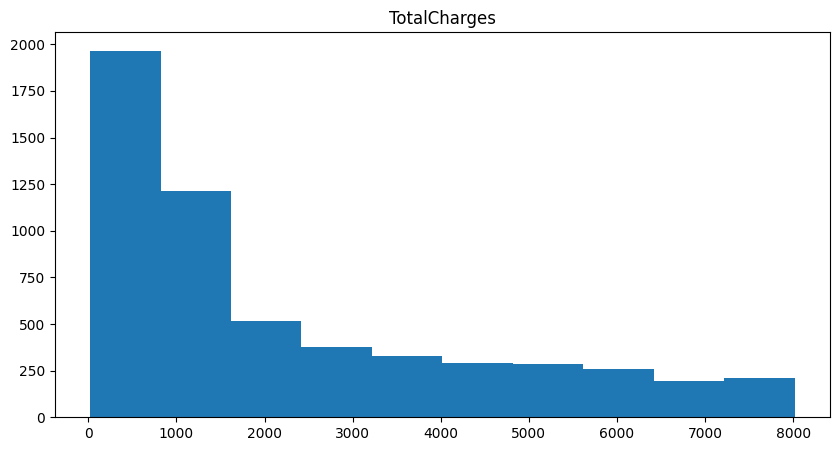

In [102]:
for i in num_cols2:
  plt.figure(figsize=(10,5))
  plt.hist(df[i])
  plt.title(i)

In [103]:
xtest[['tenure','MonthlyCharges','TotalCharges','Customer Lifetime Value']] = min_scaler.transform(xtest
 [['tenure','MonthlyCharges','TotalCharges','Customer Lifetime Value']])

In [104]:
xtest.isna().sum()

,0
gender,0
SeniorCitizen,0
Partner,0
Dependents,0
tenure,0
PhoneService,0
MultipleLines,0
InternetService,0
OnlineSecurity,0
OnlineBackup,0


In [105]:
xtest['TotalCharges'].fillna(xtest['TotalCharges'].median(), inplace =True)

/tmp/ipython-input-389342889.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  xtest['TotalCharges'].fillna(xtest['TotalCharges'].median(), inplace =True)


In [106]:
y_pred3 = logit_model.predict(xtest)
print("Accuracy score is",accuracy_score(ytest,y_pred3))
print("Presicion score is",precision_score(ytest,y_pred3,average ='weighted'))
print("Recall score is",recall_score(ytest,y_pred3,average ='weighted'))
print("f1 score is",f1_score(ytest,y_pred3,average ='weighted'))

Accuracy score is 0.8126330731014905
Presicion score is 0.80313161051151
Recall score is 0.8126330731014905
f1 score is 0.8047991849261414


In [107]:
y_pred4 = dtree.predict(xtest)
print("Accuracy score is",accuracy_score(ytest,y_pred4))
print("Presicion score is",precision_score(ytest,y_pred4))
print("Recall score is",recall_score(ytest,y_pred4))
print("f1 score is",f1_score(ytest,y_pred4))
print(confusion_matrix(ytest, y_pred4))

Accuracy score is 0.801277501774308
Presicion score is 0.6778242677824268
Recall score is 0.4438356164383562
f1 score is 0.5364238410596026
[[967  77]
 [203 162]]


In [108]:
y_pred5 = rforest.predict(xtest)
print("Accuracy score is",accuracy_score(ytest,y_pred5))
print("Presicion score is",precision_score(ytest,y_pred5))
print("Recall score is",recall_score(ytest,y_pred5))
print("f1 score is",f1_score(ytest,y_pred5))
print(confusion_matrix(ytest, y_pred5))

Accuracy score is 0.7885024840312278
Presicion score is 0.6120401337792643
Recall score is 0.5013698630136987
f1 score is 0.5512048192771084
[[928 116]
 [182 183]]


The most apt model for theprediction is logistic refgression followed by random forest. The accuracy, precision, recall and f1-score were comparatively better for Logistic Regression.

 The company should be able to give attractive discounts and speed to retain the customers.